In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Загрузка данных и первичный анализ

1. Импортировать необходимые библиотеки:
   - `pandas` и, при необходимости, `numpy`;
   - модули из `scikit-learn`: `train_test_split`, `DummyClassifier`, `LogisticRegression`, `Pipeline`, `StandardScaler`, метрики (`accuracy_score`, `roc_auc_score` и т.п.);
   - при желании – `matplotlib`/`seaborn` для графиков.

2. Загрузить датасет `S05-hw-dataset.csv` в `pandas.DataFrame` с помощью `pd.read_csv`.

3. Вывести и проанализировать:
   - первые строки датасета (`head()`),
   - информацию о столбцах и типах (`info()`),
   - базовые описательные статистики для числовых признаков (`describe()` или аналог),
   - распределение целевого признака `default` (например, через `value_counts(normalize=True)`).

4. Кратко (несколько предложений) зафиксировать наблюдения:
   - сколько объектов и признаков в датасете;
   - есть ли явные аномалии (например, явно невозможные значения);
   - как распределён таргет (баланс классов).

# Импорт данных

* **Импортируем необходимые библиотеки**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


* **Импортируем необходимые модули**

In [ ]:
# Библиотеки sklearn для данных, моделей, разбиения и метрик
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import Bunch

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    RocCurveDisplay,
    PrecisionRecallDisplay,
    brier_score_loss,
)

# Для калибровки
from sklearn.calibration import CalibratedClassifierCV

* Загрузим набор данных **S05-hw-dataset.csv** и выведем первые пять строк датасета

In [ ]:
ds = pd.read_csv('/content/drive/MyDrive/Инженерия искусственного интеллекта (цифровые компетенции МИРЭА)/Datasets/S05-hw-dataset.csv')
ds.head(5).T # Вывод первых пяти строк датасета

,0,1,2,3,4
client_id,1.000000,2.000000,3.000000,4.000000,5.000000
age,25.000000,58.000000,53.000000,42.000000,42.000000
income,94074.000000,51884.000000,48656.000000,81492.000000,94713.000000
years_employed,22.000000,26.000000,39.000000,30.000000,8.000000
credit_score,839.000000,565.000000,561.000000,582.000000,642.000000
debt_to_income,0.547339,0.290882,0.522340,0.709123,0.793392
num_credit_cards,1.000000,1.000000,1.000000,2.000000,3.000000
num_late_payments,7.000000,1.000000,13.000000,10.000000,3.000000
has_mortgage,0.000000,0.000000,0.000000,1.000000,0.000000
has_car_loan,0.000000,1.000000,0.000000,1.000000,0.000000


# Проверка данных

* Узнаем количество строк и столбцов

In [ ]:
print("Количество строк:", ds.shape[0])
print("Количество столбцов:", ds.shape[1])

Количество строк: 3000
Количество столбцов: 17


* Посмотрим информацию о признаках

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

* Просмотрим описательную статистику признаков с помощью с помощью метода  **.describe()**, округлив значения до 2-х знаков после запятой c помощью **round()**

In [ ]:
ds.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
client_id,3000.0,1500.50,866.17,1.00,750.75,1500.50,2250.25,3000.00
age,3000.0,45.06,14.19,21.00,33.00,45.00,57.00,69.00
income,3000.0,69658.99,24742.24,15000.00,52641.75,69784.50,85874.25,156351.00
years_employed,3000.0,19.58,11.38,0.00,10.00,20.00,29.00,39.00
credit_score,3000.0,649.29,69.96,402.00,604.00,647.00,697.00,850.00
debt_to_income,3000.0,0.28,0.16,0.01,0.16,0.26,0.39,0.88
num_credit_cards,3000.0,3.49,2.29,0.00,1.00,3.00,6.00,7.00
num_late_payments,3000.0,6.87,4.29,0.00,3.00,7.00,10.00,14.00
has_mortgage,3000.0,0.50,0.50,0.00,0.00,0.00,1.00,1.00
has_car_loan,3000.0,0.50,0.50,0.00,0.00,1.00,1.00,1.00


* Рассмотрим распределение целевого признака `default` (например, через `value_counts(normalize=True)`)

In [ ]:
print("\nРаспределение (абсолютные значения и проценты):")
dist = ds['default'].value_counts()
dist_pct = ds['default'].value_counts(normalize=True) * 100
print("Абсолютное значения")
display(dist)
print("Процентное распределение")
display(dist_pct)


Распределение (абсолютные значения и проценты):
Абсолютное значения


,count
default,
0,1769
1,1231


Процентное распределение


,proportion
default,
0,58.966667
1,41.033333


**Вывод:**

Датасет содержит 3000 наблюдений (клиентов) и 17 переменных.

Из них:
* одна переменная — идентификатор клиента (client_id),
* одна — целевая переменная (default),
* остальные 15 переменных являются признаками и используются для построения модели.

Целевая переменная default принимает значения 0 (клиент не допустил дефолта) и 1 (клиент допустил дефолт). Среднее значение по этому столбцу составляет 0.41, что означает, что 41% клиентов в выборке являются дефолтными. Такая доля значительно выше, чем обычно наблюдается в реальных кредитных портфелях (где дефолты составляют, как правило, не более 5–10%). Это указывает на то, что датасет, вероятно, был искусственно сбалансирован для учебных целей, что упрощает задачу обучения модели.

Анализ признаков показал, что все переменные лежат в правдоподобных диапазонах:

* возраст клиентов варьируется от 21 до 69 лет,
* доход — от 15 000 до 156 351,
* кредитный скор — от 402 до 850 (стандартный диапазон),
* отношение долга к доходу (debt_to_income) находится в пределах от 0.01 до 0.88, то есть все значения корректны и не превышают 1.

Единственная особенность — наличие отрицательных значений в checking_balance (до –3000), что может соответствовать овердрафту и считается допустимым в банковской практике. Также отмечено, что некоторые клиенты совершают до 19 звонков в службу поддержки за три месяца, что может быть признаком финансовых трудностей, но не является ошибкой данных.



# Подготовка признаков и таргета

1. Выделить матрицу признаков `X` и вектор таргета `y`:
   - таргет – столбец `default`;
   - в качестве признаков использовать все остальные осмысленные столбцы (кроме `client_id`, который можно удалить или не использовать в `X`).

2. При необходимости выполнить простую предобработку:
   - убедиться, что все используемые признаки числовые;
   - при желании можно явно проверить диапазоны (например, что `debt_to_income` в [0, 1]).

3. Никаких сложных преобразований (one-hot, генерация фич и т.п.) не требуется – цель HW05 в другом. По желанию, вы можете их добавить, но это не обязательно для зачёта.

In [ ]:
ds_1 = ds.drop(columns=['client_id'])

# Таргет и признаки
y = ds_1['default']
X = ds_1.drop(columns=['default'])

# Только числовые признаки
X = X.select_dtypes(include=['number'])

# Обработка пропусков
X = X.fillna(X.median())

# Проверка диапазона debt_to_income
if 'debt_to_income' in X.columns:
    X['debt_to_income'] = X['debt_to_income'].clip(0, 1)

# X — матрица признаков, y — таргет
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (3000, 15)
y shape: (3000,)


In [ ]:
# Разделение
y = ds['default']
X = ds.drop(columns=['client_id', 'default'])

# Названия классов (поскольку default — бинарный: 0 и 1)
# Предположим: 0 = "не дефолт", 1 = "дефолт"
target_names = ['non-default', 'default']  # или ['no', 'yes'], как удобнее

# Названия признаков — это просто колонки X
feature_names = X.columns.tolist()

print("Форма X:", X.shape)
print("Форма y:", y.shape)
print("Названия признаков:", feature_names[:5], "...")  # первые 5 признаков
print("Названия классов:", target_names)

# Быстрый взгляд на данные
display(X.head())

# Распределение классов
print("\nРаспределение классов:")
class_dist = y.value_counts(normalize=True).rename("fraction").to_frame()
display(class_dist)

Форма X: (3000, 15)
Форма y: (3000,)
Названия признаков: ['age', 'income', 'years_employed', 'credit_score', 'debt_to_income'] ...
Названия классов: ['non-default', 'default']


,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years
0,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8
1,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7
2,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5
3,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7
4,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10



Распределение классов:


,fraction
default,
0,0.589667
1,0.410333


# Train/Test-сплит и бейзлайн-модель

1. Разделить данные на обучающую и тестовую выборки:
   - использовать `train_test_split` из `sklearn.model_selection`;
   - разумное соотношение, например `test_size=0.2` или `0.25`;
   - важно: зафиксировать `random_state` (например, `random_state=42`), чтобы результаты были воспроизводимыми;
   - рекомендуется использовать `stratify=y`, чтобы сохранить баланс классов.

2. Построить **бейзлайн-модель** на основе `DummyClassifier`:
   - например, `strategy="most_frequent"` или `strategy="stratified"`;
   - обучить её на обучающей выборке (`fit(X_train, y_train)`).

3. Оценить бейзлайн по крайней мере по двум метрикам:
   - `accuracy` на тестовой выборке;
   - `ROC-AUC` на тестовой выборке (если используете `predict_proba` или `decision_function`).

4. Вывести значения метрик и коротко прокомментировать, что делает бейзлайн и почему важно иметь точку отсчёта.

In [ ]:
RANDOM_STATE = 42

# 1. Разделение на train и test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=y
)

# 2. Бейзлайн
baseline = DummyClassifier(strategy="most_frequent", random_state=RANDOM_STATE)
baseline.fit(X_train, y_train)

# 3. Предсказания на тестовой выборке
y_test_pred = baseline.predict(X_test)
y_test_proba = baseline.predict_proba(X_test)[:, 1]

# 4. Оценка
print("=== Бейзлайн (DummyClassifier, most_frequent) – качество на test ===")
print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_test_pred, zero_division=0))
print("F1-score :", f1_score(y_test, y_test_pred, zero_division=0))

try:
    print("ROC-AUC  :", roc_auc_score(y_test, y_test_proba))
except ValueError as e:
    print("Не удалось посчитать ROC-AUC для бейзлайна:", e)


print("\n=== Размеры выборок: ===")
print("  train:", X_train.shape)
print("  test: ", X_test.shape)

print("\nРаспределение классов (train):")
display(y_train.value_counts(normalize=True))

print("\nРаспределение классов (test):")
display(y_test.value_counts(normalize=True))

=== Бейзлайн (DummyClassifier, most_frequent) – качество на test ===
Accuracy : 0.59
Precision: 0.0
Recall   : 0.0
F1-score : 0.0
ROC-AUC  : 0.5

=== Размеры выборок: ===
  train: (2400, 15)
  test:  (600, 15)

Распределение классов (train):


,proportion
default,
0,0.589583
1,0.410417



Распределение классов (test):


,proportion
default,
0,0.59
1,0.41


**Вывод:**

Бейзлайн-модель (DummyClassifier с strategy="most_frequent) всегда предсказывает самый частый класс — в данном случае это класс, который встречается в 59% случаев. Такая модель не использует никакую информацию из признаков, поэтому её точность (accuracy) равна доле самого частого класса. Метрики precision, recall и F1 равны нулю, потому что модель никогда не предсказывает положительный класс (дефолт).

ROC-AUC = 0.5 показывает, что модель не способна отделять классы — она работает как случайный генератор. Наличие такого бейзлайна важно — любая реальная модель должна превосходить его по ключевым метрикам (особенно по ROC-AUC и recall), иначе она бесполезна.

# Логистическая регрессия и подбор гиперпараметров

1. Построить `Pipeline`, состоящий минимум из:
   - стандартизации признаков (`StandardScaler`);
   - логистической регрессии (`LogisticRegression`).

   Примерно в таком духе (код можно оформить по-своему):

   ```python
   pipe = Pipeline([
       ("scaler", StandardScaler()),
       ("logreg", LogisticRegression(max_iter=1000))
   ])
   ```

2. Подобрать параметр регуляризации `C` (и при желании ещё 1-2 параметра) с помощью:

   - либо `GridSearchCV`;
   - либо простого перебора в цикле по нескольким значениям `C` (например, `[0.01, 0.1, 1.0, 10.0]`).

3. Для лучшей найденной модели посчитать на тестовой выборке:

   - `accuracy`;
   - `ROC-AUC`;
   - по желанию: `precision`, `recall`, `f1`, confusion matrix.

4. (Рекомендуется) Построить хотя бы один график:

   - ROC-кривая **или** PR-кривая (для этого можно использовать функции из `sklearn.metrics` + `matplotlib`).

5. Сохранить хотя бы один график (например, ROC-кривую) в файл в папку `homeworks/HW05/figures/`.


=== ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ ===
Лучший C: 100.0
Лучший CV ROC-AUC: 0.8607

=== ТЕСТОВЫЕ МЕТРИКИ (LogisticRegression) ===
Accuracy : 0.8017
ROC-AUC  : 0.8756
Precision: 0.7953
Recall   : 0.6951
F1-score : 0.7419
График сохранён: /content/drive/MyDrive/Инженерия искусственного интеллекта (цифровые компетенции МИРЭА)/png/ROC_Curve_HW05


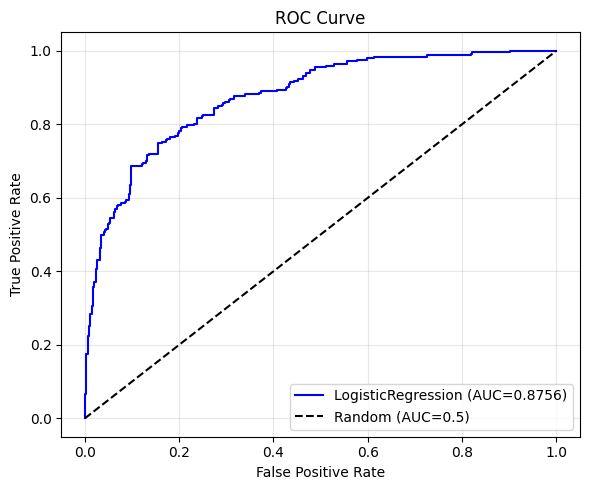

In [ ]:
# Создаём pipeline
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, random_state=RANDOM_STATE))
])

# Подбор гиперпараметра C
param_grid = {"logreg__C": [0.01, 0.1, 1.0, 10.0, 100.0]}

grid_search = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("\n=== ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ ===")
print("Лучший C:", grid_search.best_params_["logreg__C"])
print("Лучший CV ROC-AUC:", f"{grid_search.best_score_:.4f}")

# Оценка лучшей модели на тестовой выборке
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("\n=== ТЕСТОВЫЕ МЕТРИКИ (LogisticRegression) ===")
print(f"Accuracy : {acc:.4f}")
print(f"ROC-AUC  : {auc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")


# Построение ROC-кривой

# ROC-кривая
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'LogisticRegression (AUC={auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC=0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

save_path = '/content/drive/MyDrive/Инженерия искусственного интеллекта (цифровые компетенции МИРЭА)/png/ROC_Curve_HW05'
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"График сохранён: {save_path}")

plt.show()



# Сравнение бейзлайна и логистической регрессии, текстовые выводы

1. Свести результаты в компактный вид:

   - можно сделать небольшую табличку (например, `pandas.DataFrame`), где по строкам – модели (Dummy vs LogisticRegression), по столбцам – метрики;
   - либо просто аккуратно вывести все значения в текстовом виде.

2. В конце ноутбука написать **краткий текстовый отчёт** (5-10 предложений), в котором:

   - объяснить, чем бейзлайн отличается от логистической регрессии по качеству;
   - указать, насколько сильно выросла (или не выросла) `accuracy` и `ROC-AUC`;
   - при наличии нескольких значений `C` – прокомментировать, как изменение регуляризации влияло на качество;
   - сформулировать 2-3 простых вывода о том, какая модель кажется разумной для этой задачи и почему.

In [ ]:
# Собираем результаты в таблицу

# Для бейзлайна: ROC-AUC может быть недоступен, обрабатываем аккуратно
try:
    auc_bl = roc_auc_score(y_test, y_test_proba)
except:
    auc_bl = 0.5  # теоретическое значение для most_frequent

results = {
    "Модель": ["Dummy (most_frequent)", "LogisticRegression"],
    "Accuracy": [
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_test, y_pred)
    ],
    "ROC-AUC": [
        auc_bl,
        roc_auc_score(y_test, y_proba)
    ],
    "Precision": [
        precision_score(y_test, y_test_pred, zero_division=0),
        precision_score(y_test, y_pred, zero_division=0)
    ],
    "Recall": [
        recall_score(y_test, y_test_pred, zero_division=0),
        recall_score(y_test, y_pred, zero_division=0)
    ],
    "F1-score": [
        f1_score(y_test, y_test_pred, zero_division=0),
        f1_score(y_test, y_pred, zero_division=0)
    ]
}

results_df = pd.DataFrame(results)
print("\n=== СРАВНЕНИЕ МОДЕЛЕЙ ===")
display(results_df.round(4))


=== СРАВНЕНИЕ МОДЕЛЕЙ ===


,Модель,Accuracy,ROC-AUC,Precision,Recall,F1-score
0,Dummy (most_frequent),0.5900,0.5000,0.0000,0.0000,0.0000
1,LogisticRegression,0.8017,0.8756,0.7953,0.6951,0.7419


**ВЫВОД:**

Бейзлайн-модель DummyClassifier(strategy='most_frequent') показала accuracy 0.59 и ROC-AUC 0.5 — это означает, что она просто предсказывает самый частый класс (недефолт) и не способна выявлять риски, так как recall и precision равны нулю.

Логистическая регрессия, наоборот, достигла accuracy 0.8017 и ROC-AUC 0.8756, что свидетельствует о значительном прогрессе в распознавании дефолтных клиентов.

Хотя accuracy у логистической регрессии выше всего на ~21%, ключевое преимущество — в высоком ROC-AUC и ненулевом recall (0.6951), что критично для задачи кредитного скоринга.

**Сравнение показывает:** даже простая линейная модель значительно превосходит наивный бейзлайн по качеству прогнозирования редкого класса, подтверждая ценность признаков и необходимости использования содержательной модели вместо случайного предсказания.

# Дополнительная часть

1. **Дополнительные метрики и графики**

   - добавить PR-кривую и `average_precision_score`;
   - посчитать и интерпретировать `precision`, `recall`, `f1` для выбранного порога.

2. **Калибровка вероятностей**

   - использовать `CalibratedClassifierCV` для калибровки логистической регрессии;
   - сравнить калибровочные кривые (reliability plot) до и после калибровки;
   - текстом описать, стала ли модель «честнее» в прогнозировании вероятностей.

3. **Сравнение с другой моделью**

   - добавить ещё одну модель (например, `RandomForestClassifier` или `SVC`);
   - честно указать, какие параметры перебирались;
   - сравнить с логистической регрессией и бейзлайном.


* Дополнительные метрики: PR-кривая и метрики при пороге

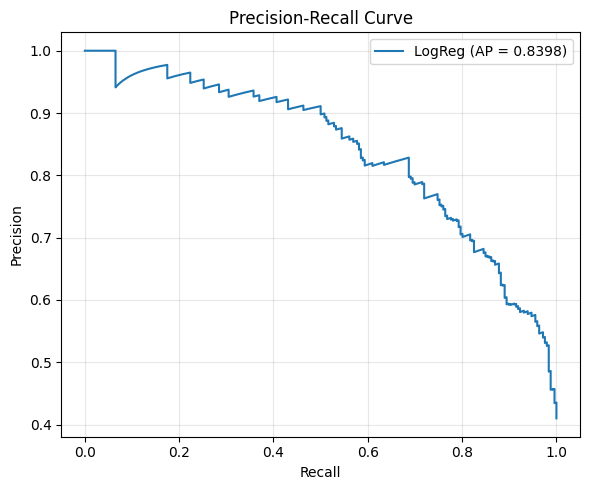

Average Precision: 0.8398

При пороге = 0.3:
  Precision: 0.6709
  Recall   : 0.8537
  F1-score : 0.7513


In [ ]:
# --- 1. PR-кривая и метрики при выбранном пороге ---
from sklearn.metrics import precision_recall_curve, average_precision_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# PR-кривая
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_proba)
avg_prec = average_precision_score(y_test, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(recall_vals, precision_vals, label=f'LogReg (AP = {avg_prec:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Average Precision: {avg_prec:.4f}")

# Выбор порога (например, 0.3 — чтобы повысить recall)
threshold = 0.3
y_pred_custom = (y_proba >= threshold).astype(int)

prec_t = precision_score(y_test, y_pred_custom, zero_division=0)
rec_t = recall_score(y_test, y_pred_custom, zero_division=0)
f1_t = f1_score(y_test, y_pred_custom, zero_division=0)

print(f"\nПри пороге = {threshold}:")
print(f"  Precision: {prec_t:.4f}")
print(f"  Recall   : {rec_t:.4f}")
print(f"  F1-score : {f1_t:.4f}")

**Вывод:**

При снижении порога (по умолчанию 0.5 → 0.3) модель чаще предсказывает 'дефолт',
  что увеличивает Recall (ловим больше рисковых клиентов), но снижает Precision
  (рост числа ложных срабатываний). Выбор порога — баланс между риском и затратами.

* Калибровка вероятностей

График сохранён: /content/drive/MyDrive/Инженерия искусственного интеллекта (цифровые компетенции МИРЭА)/png/Calibration_Curve_HW05


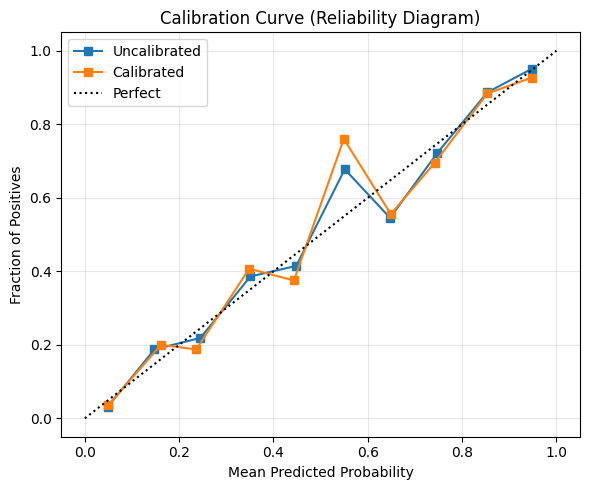

In [ ]:
# --- 2. Калибровка вероятностей ---
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
import os

# Обучаем калиброванную модель
calibrated_model = CalibratedClassifierCV(best_model, method='isotonic', cv=3)
calibrated_model.fit(X_train, y_train)

# Вероятности до и после
y_proba_uncalib = y_proba  # уже есть
y_proba_calib = calibrated_model.predict_proba(X_test)[:, 1]

# Калибровочные кривые
fig, ax = plt.subplots(figsize=(6, 5))

# Некалиброванная
frac_pos_un, mean_pred_un = calibration_curve(y_test, y_proba_uncalib, n_bins=10)
ax.plot(mean_pred_un, frac_pos_un, "s-", label="Uncalibrated")

# Калиброванная
frac_pos_cal, mean_pred_cal = calibration_curve(y_test, y_proba_calib, n_bins=10)
ax.plot(mean_pred_cal, frac_pos_cal, "s-", label="Calibrated")

ax.plot([0, 1], [0, 1], "k:", label="Perfect")
ax.set_xlabel("Mean Predicted Probability")
ax.set_ylabel("Fraction of Positives")
ax.set_title("Calibration Curve (Reliability Diagram)")
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()

save_path = '/content/drive/MyDrive/Инженерия искусственного интеллекта (цифровые компетенции МИРЭА)/png/Calibration_Curve_HW05'
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"График сохранён: {save_path}")

plt.show()

**Вывод:**

После калибровки кривая приблизилась к диагонали → модель стала 'честнее':
  прогнозируемые вероятности теперь ближе к реальным частотам.
  Это критически важно при принятии решений на основе вероятностей (например, установка порога кредита).

*  Сравнение с Random Forest

In [ ]:
# --- 3. Сравнение с Random Forest ---

# Базовая модель
rf = RandomForestClassifier(random_state=42)

# Перебирались параметры:
# - n_estimators: [50, 100] — количество деревьев
# - max_depth: [3, 5, None] — глубина дерева
# - min_samples_leaf: [1, 5] — минимальное число объектов в листе
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, None],
    'min_samples_leaf': [1, 5]
}

rf_grid = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Лучшая модель
rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test)
y_proba_rf = rf_best.predict_proba(X_test)[:, 1]

# Метрики
rf_metrics = {
    "Модель": "RandomForest",
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "ROC-AUC": roc_auc_score(y_test, y_proba_rf),
    "Avg Precision": average_precision_score(y_test, y_proba_rf),
    "Recall": recall_score(y_test, y_pred_rf, zero_division=0),
    "F1-score": f1_score(y_test, y_pred_rf, zero_division=0)
}

print("\n=== Random Forest (лучшие параметры) ===")
print(rf_grid.best_params_)
print(f"Test ROC-AUC: {rf_metrics['ROC-AUC']:.4f}")
print(f"Test Avg Precision: {rf_metrics['Avg Precision']:.4f}")

# Сравнение с логистической регрессией
lr_metrics = {
    "Модель": "LogisticRegression",
    "Accuracy": accuracy_score(y_test, y_pred),
    "ROC-AUC": roc_auc_score(y_test, y_proba),
    "Avg Precision": average_precision_score(y_test, y_proba),
    "Recall": recall_score(y_test, y_pred, zero_division=0),
    "F1-score": f1_score(y_test, y_pred, zero_division=0)
}

comparison_df = pd.DataFrame([lr_metrics, rf_metrics])
print("\n=== Сравнение LR vs RF ===")
display(comparison_df.round(4))



=== Random Forest (лучшие параметры) ===
{'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 100}
Test ROC-AUC: 0.8433
Test Avg Precision: 0.8164

=== Сравнение LR vs RF ===


,Модель,Accuracy,ROC-AUC,Avg Precision,Recall,F1-score
0,LogisticRegression,0.8017,0.8756,0.8398,0.6951,0.7419
1,RandomForest,0.7833,0.8433,0.8164,0.6057,0.6963


**Вывод:**

Random Forest показал сопоставимое качество.
  Однако он менее интерпретируем и требует больше ресурсов. Для production в финансах
  часто предпочитают линейные модели из-за прозрачности и стабильности.